<a href="https://colab.research.google.com/github/GitZy6666/ZyRep/blob/main/Signal_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
dataset = pd.read_csv('datasetFx1 rev2.csv') 

In [ ]:
dataset.sample(n=12)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,desc,label
21,84.54,709.76,118.87,122.82,211.70,1.00,0.81,44.00,149.48,80.90,37992.01,1.85,0.66,3.10350.11000,PVC
127,90.20,665.21,28.96,30.79,37.74,0.29,0.11,11.00,26.50,20.40,1698.47,1.30,0.10,N 4.1000.2000,Normal
69,94.66,633.83,36.80,35.32,72.66,1.00,0.50,22.50,51.07,19.83,3181.39,2.58,0.53,6.12210.12580,PVC
88,118.61,505.87,92.73,65.24,113.34,0.87,0.72,53.86,80.12,83.91,21120.83,0.95,0.43,7.7700.9260,PVC
83,120.72,497.03,104.16,92.38,138.41,0.80,0.71,68.32,97.49,99.19,30378.84,0.98,0.50,7.1130.2400,PVC
119,75.68,792.77,73.37,60.12,77.66,0.57,0.39,52.36,54.64,76.01,13046.92,0.72,0.05,N 3.11000.12000,Normal
62,98.90,606.68,86.42,54.63,93.98,0.71,0.59,52.00,66.43,98.56,20569.14,0.67,0.09,6.4800.5500,AF
93,77.09,778.26,51.40,52.12,60.73,0.38,0.08,23.97,42.36,44.17,5878.05,0.96,0.05,N 1.1000.2000,Normal
72,95.64,627.37,68.56,64.02,116.18,0.88,0.63,23.60,82.09,50.77,13092.77,1.62,0.35,6.14360.14660,PVC
86,116.24,516.19,63.88,60.51,102.61,0.80,0.60,26.83,72.56,66.78,15222.20,1.09,0.48,7.5900.6300,PVC


In [ ]:
datasetX = dataset[['bpm','ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
datasetX1 = dataset[['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'label']]
datasetX.sample(n=15)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
69,0.527114,0.309659,0.151278,0.199566,0.210390,1.000000,0.50,0.086803,0.208856,0.048133,0.026168,1.000000,0.585366
128,0.423338,0.405196,0.139444,0.167028,0.072199,0.000000,0.04,0.038840,0.070682,0.092384,0.019296,0.211454,0.073171
36,0.349580,0.481883,0.638774,0.568547,0.556274,0.851852,0.79,0.500951,0.555364,0.461882,0.417025,0.273128,0.134146
106,0.286152,0.555138,0.237077,0.293348,0.212607,0.851852,0.36,0.080815,0.210790,0.122894,0.054385,0.444934,0.182927
103,0.196578,0.671324,0.413810,0.529790,0.315216,0.691358,0.30,0.122733,0.303848,0.230533,0.128348,0.321586,0.219512
133,0.009199,0.981769,0.203249,0.267462,0.127365,0.160494,0.02,0.000000,0.125314,0.099915,0.030439,0.330396,0.268293
70,0.392511,0.436346,0.487273,0.468980,0.377623,0.753086,0.67,0.223920,0.377300,0.412546,0.265338,0.185022,0.036585
105,0.243706,0.608115,0.407168,0.475994,0.274645,0.604938,0.27,0.178420,0.267043,0.244275,0.121293,0.251101,0.073171
111,0.231117,0.624486,0.063582,0.067173,0.052025,0.407407,0.09,0.005597,0.051757,0.048560,0.009384,0.325991,0.134146
47,0.324241,0.510387,0.745562,0.933695,0.793563,0.901235,0.85,0.403011,0.793444,0.381609,0.484573,0.541850,0.304878


In [ ]:
AF = ['AF']
PVC = ['PVC']
Normal = ['Normal']

datasetAF = datasetX1.loc[datasetX1['label'].isin(AF)]
datasetPVC = datasetX1.loc[datasetX1['label'].isin(PVC)]
datasetNormal = datasetX1.loc[datasetX1['label'].isin(Normal)]

In [ ]:
datasetAF.sample(n=11)

,bpm,ibi,sdnn,sdsd,rmssd,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
78,86.24,695.73,149.65,122.57,213.77,0.86,116.00,151.13,151.22,71798.46,1.00,0.14,AF
55,93.69,640.40,115.25,85.37,162.04,0.73,41.00,114.57,124.59,44844.43,0.92,0.06,AF
64,91.29,657.23,122.62,50.41,110.43,0.83,77.00,77.98,160.98,39438.92,0.48,0.12,AF
33,86.08,697.02,108.77,91.49,149.05,0.73,57.33,105.35,113.46,37553.15,0.93,0.23,AF
10,78.57,763.67,167.67,119.34,216.08,0.80,89.24,151.98,211.98,101211.33,0.72,0.15,AF
47,82.09,730.94,143.26,136.85,230.49,0.85,79.00,162.89,105.74,54111.82,1.54,0.30,AF
46,98.67,608.06,128.18,115.65,179.92,0.74,83.58,126.90,133.41,53185.96,0.95,0.13,AF
67,89.21,672.58,102.21,72.91,106.91,0.47,75.41,75.59,128.51,30518.99,0.59,0.09,AF
6,74.21,808.50,143.03,91.23,187.68,0.85,110.71,132.68,123.09,51305.46,1.08,0.22,AF
30,83.80,716.00,85.39,78.12,113.08,0.50,87.00,78.53,96.95,23919.26,0.81,0.28,AF


In [ ]:
datasetPVC.sample(n=11)

,bpm,ibi,sdnn,sdsd,rmssd,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
72,95.64,627.37,68.56,64.02,116.18,0.63,23.60,82.09,50.77,13092.77,1.62,0.35,PVC
83,120.72,497.03,104.16,92.38,138.41,0.71,68.32,97.49,99.19,30378.84,0.98,0.50,PVC
69,94.66,633.83,36.80,35.32,72.66,0.50,22.50,51.07,19.83,3181.39,2.58,0.53,PVC
12,93.79,639.71,134.52,95.25,231.57,1.00,99.00,163.24,88.10,45182.23,1.85,0.45,PVC
24,85.68,700.28,123.00,101.54,194.89,0.91,62.39,137.79,104.59,45275.90,1.32,0.25,PVC
14,81.40,737.06,121.31,74.93,201.12,0.93,116.00,141.65,83.02,36943.06,1.71,0.08,PVC
84,117.90,508.89,100.99,98.21,152.76,0.73,61.90,107.95,94.38,32008.89,1.14,0.87,PVC
15,88.44,678.43,100.31,61.76,126.81,1.00,82.00,89.57,48.83,13740.29,1.83,0.42,PVC
56,98.43,609.60,119.11,52.39,183.15,1.00,88.00,122.96,100.81,38941.65,1.22,0.33,PVC
66,91.76,653.85,85.79,68.41,105.91,0.58,58.50,74.59,86.37,20237.46,0.86,0.38,PVC


In [ ]:
datasetNormal.sample(n=11)

,bpm,ibi,sdnn,sdsd,rmssd,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
103,74.18,808.80,83.83,80.99,101.03,0.30,28.92,69.24,66.82,14533.91,1.04,0.23,Normal
101,78.18,767.48,59.87,60.89,71.66,0.08,23.94,49.89,47.00,7367.37,1.06,0.05,Normal
134,62.94,953.26,49.78,47.51,54.01,0.03,7.99,37.82,35.77,4250.38,1.06,0.32,Normal
94,73.52,816.15,27.83,17.27,26.96,0.09,18.98,19.04,35.14,2102.19,0.54,0.05,Normal
105,77.10,778.22,82.64,73.55,90.05,0.27,38.87,62.20,70.36,13750.08,0.88,0.11,Normal
131,62.00,967.81,11.29,11.49,19.60,0.00,6.99,13.85,7.43,323.06,1.86,0.40,Normal
110,74.02,810.58,53.99,48.17,60.02,0.22,16.97,41.68,43.09,5642.53,0.97,0.41,Normal
106,79.73,752.59,52.17,48.29,73.26,0.36,21.43,51.44,39.09,6316.38,1.32,0.20,Normal
93,77.09,778.26,51.40,52.12,60.73,0.08,23.97,42.36,44.17,5878.05,0.96,0.05,Normal
115,72.97,822.20,65.18,61.02,68.37,0.05,21.94,47.68,52.78,7907.31,0.90,0.05,Normal


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(datasetX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data = scaler.transform(datasetX)
scaled_data[:5]

array([[ 0.66315687, -0.74774889,  1.78298127,  0.52778917,  0.88254817,
         0.60810777,  0.77559648,  1.40388441,  0.89887169,  1.67208301,
         1.59861931, -0.74305557, -0.97839003],
       [ 0.81280924, -0.87022641,  2.01142086,  2.06981958,  2.4419528 ,
         0.99604393,  0.71425485,  3.19928177,  2.46098756,  1.55316278,
         2.99207038,  0.37797979,  0.66077687],
       [ 1.18106375, -1.15045653,  1.08121108,  0.84735783,  0.89818402,
         0.52189973,  0.99029218,  1.6063709 ,  0.9096207 ,  1.15949582,
         1.19783558, -0.41920091, -0.15880658],
       [ 0.6333831 , -0.72321398,  2.18980116, -0.04341589,  1.57826587,
         0.99604393,  1.32767113,  2.85880638,  1.59733777,  1.79612911,
         2.41044264, -0.36937712, -0.43200106],
       [ 0.94835824, -0.97644584,  1.60272081,  0.708304  ,  1.32081627,
         0.99604393,  1.05163381,  1.73870661,  1.19611464,  1.74384522,
         1.95498093, -0.59358419,  1.42572143]])

In [ ]:
scaled_dataFrame = pd.DataFrame()
scaled_dataFrame[['bpm','ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate']] = pd.DataFrame(scaled_data)
scaled_dataFrame['label'] = pd.DataFrame(dataset['label'])
scaled_dataFrame.sample(n=11)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
98,-0.917987,0.919640,-1.767938,-1.796578,-1.530326,-1.245365,-1.463373,-1.238718,-1.517242,-1.452854,-1.184556,-0.095346,0.442221,Normal
53,0.652971,-0.739472,0.376151,-0.093807,0.129086,0.996044,0.591572,0.740921,0.142493,0.712520,0.287122,-0.718144,-0.923751,AF
41,0.093538,-0.235373,0.556411,0.697460,0.493974,0.478796,0.744926,0.805162,0.511030,0.895206,0.678731,-0.543760,-0.377362,AF
122,-0.668828,0.599701,-1.084735,-0.871998,-1.135095,-1.891925,-1.095323,-1.161373,-1.131155,-1.049550,-1.044058,-0.244818,-1.306223,Normal
12,0.546412,-0.649609,0.913172,0.679919,1.593747,0.996044,1.327671,0.972187,1.601944,-0.070713,0.558058,1.972341,0.879332,PVC
136,-1.887985,2.473518,-1.062643,-0.779189,-1.119769,-1.288469,-1.586056,-1.238205,-1.115799,-1.150427,-1.064739,0.128861,0.770055,Normal
102,-0.742478,0.691534,-0.910585,-1.127781,-1.247797,-1.159157,-1.494044,-1.109466,-1.258608,-0.748764,-1.013141,-1.141646,-1.306223,Normal
89,2.739485,-2.098352,-0.197769,-0.250721,-0.199731,0.521900,0.315534,0.146310,-0.184365,0.036930,-0.284792,-0.444113,-0.432001,PVC
133,-1.899738,2.496378,-1.164642,-0.931957,-1.214203,-1.935029,-1.678069,-1.392125,-1.209250,-1.196970,-1.093569,0.004301,-0.104168,Normal
10,-0.646105,0.571816,1.692263,1.448223,1.353946,0.133964,0.714255,0.721392,1.354937,2.469259,2.786506,-0.842703,-0.759834,AF


In [ ]:
scldDB = pd.read_csv('scaledZx.csv')
scldDB = scldDB[['bpm','ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'desc']]
scldDB = scldDB.drop(['desc'], axis=1)

In [ ]:
scldDB.sample(n=16)

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate
134,-1.87,2.44,-1.08,-0.84,-1.16,-1.37,-1.65,-1.37,-1.15,-1.14,-1.07,0.00,0.17
75,0.02,-0.17,0.56,0.83,0.77,0.69,0.62,0.73,0.78,0.50,0.58,0.08,0.72
39,0.54,-0.65,0.95,0.79,1.41,1.00,1.33,1.62,1.43,0.34,0.86,0.95,1.43
30,-0.24,0.10,-0.24,0.13,-0.24,-0.08,-0.21,0.66,-0.26,0.11,-0.29,-0.62,-0.05
8,0.05,-0.19,1.78,1.59,1.41,0.69,0.93,1.54,1.41,1.85,2.26,-0.52,0.17
21,-0.18,0.04,0.55,1.56,1.29,1.00,0.74,-0.44,1.30,-0.22,0.27,1.97,2.03
2,1.18,-1.15,1.08,0.85,0.90,0.52,0.99,1.61,0.91,1.16,1.20,-0.42,-0.16
13,-0.30,0.17,0.17,0.20,1.08,1.00,1.33,0.27,1.08,-0.74,-0.27,3.64,2.03
89,2.74,-2.10,-0.20,-0.25,-0.20,0.52,0.32,0.15,-0.18,0.04,-0.28,-0.44,-0.43
118,-1.07,1.13,-0.69,-0.40,-0.72,0.09,-0.60,-0.93,-0.72,-0.65,-0.81,-0.24,0.01


In [ ]:
drop_cols = ['desc']
datacekvar = dataset.drop(drop_cols, axis = 1)
# datacekvar = dataset[['bpm', 'ibi', 'label']]
datacekvar[:5]

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,label
0,95.275428,629.753143,171.525577,90.483643,185.627225,0.909091,0.818182,115.79875,131.194012,173.100312,71344.70304,0.757907,0.113507,AF
1,97.193733,617.323750,181.249188,138.833634,286.355128,1.000000,0.800000,185.66700,202.402918,167.298639,106379.77060,1.209830,0.405310,AF
2,101.888446,588.879331,141.673136,100.503504,186.636554,0.888889,0.888889,123.67870,131.684965,148.097312,61267.93447,0.889179,0.261540,AF
3,94.900146,632.243493,188.842372,72.566311,230.568362,1.000000,1.000000,172.41520,163.026168,179.154506,91756.09611,0.909975,0.211104,AF
4,98.921133,606.543800,163.855814,96.144362,213.936146,1.000000,0.909091,128.83360,144.742605,176.601372,80304.58254,0.819601,0.549934,AF


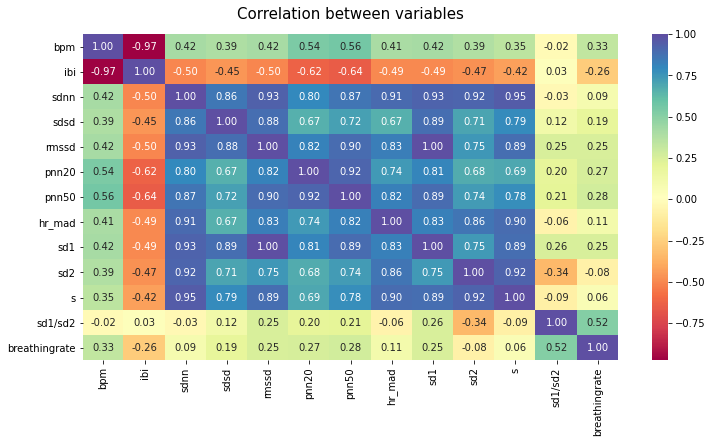

In [ ]:
sns.heatmap(datacekvar.corr(), cmap = 'Spectral', annot = True, fmt='.2f')

plt.title('Correlation between variables', fontsize = 15, pad = 15 )
plt.gcf().set_size_inches(12,6)
plt.show()

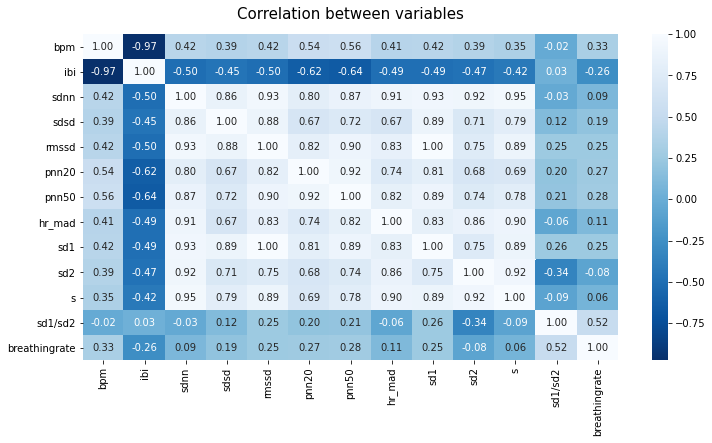

In [ ]:
plt.figure()
sns.heatmap(scaled_dataFrame.corr(), cmap = 'Blues_r', annot = True, fmt='.2f')

plt.title('Correlation between variables', fontsize = 15, pad = 15 )
plt.gcf().set_size_inches(12,6)
plt.savefig('colerasi antar variabel')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

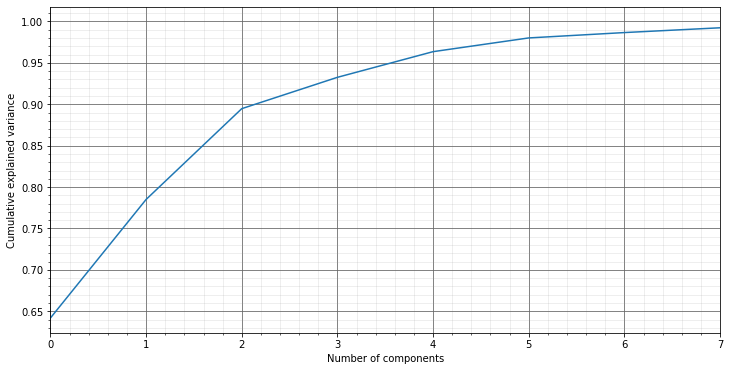

In [ ]:
pca = PCA()
pca.fit(scaled_data)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(12,6))
plt.grid(True,  which='major', color='#666666', linestyle='-')
plt.plot(exp_var_cumul)
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

In [ ]:
pecea_data = PCA(n_components=5)
pecea_data.fit(scaled_data)
pecea_dataX = pecea_data.transform(scaled_data)
pecea_dataX[:5]

array([[ 3.4179077 , -1.80699103,  0.43455817, -0.14390381, -0.1568946 ],
       [ 6.26704258, -0.50101911, -1.05635574,  0.91200875,  0.51439198],
       [ 3.38704657, -0.60206179,  0.82708835,  0.09192217,  0.02878564],
       [ 4.93148228, -1.58383273, -0.14541258,  0.26166295, -1.25555712],
       [ 4.41060927, -0.21461353,  0.37159788,  1.54405099, -0.43525374]])

In [ ]:
# pca = PCA()
# pca.fit(scaled_data)
# exp_var_cumul = np.cumsum(pecea_data.explained_variance_ratio_)

# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

total_var = pecea_data.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    pecea_dataX, x=0, y=1, z=1, color=dataset['label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
# pca = PCA()
# pca.fit(scaled_data)
# exp_var_cumul = np.cumsum(pecea_data.explained_variance_ratio_)

# px.area(
#     x=range(1, exp_var_cumul.shape[0] + 1),
#     y=exp_var_cumul,
#     labels={"x": "# Components", "y": "Explained Variance"}
# )

total_var = pecea_data.explained_variance_ratio_.sum() * 1000

fig = px.scatter_3d(
    pecea_dataX, x=0, y=1, z=1, color=dataset['label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
dataframeX = pd.DataFrame(pecea_dataX)
# dataframeX = pd.DataFrame(scaled_data)
dataframeX.head()

,0,1,2,3,4
0,3.417908,-1.806991,0.434558,-0.143904,-0.156895
1,6.267043,-0.501019,-1.056356,0.912009,0.514392
2,3.387047,-0.602062,0.827088,0.091922,0.028786
3,4.931482,-1.583833,-0.145413,0.261663,-1.255557
4,4.410609,-0.214614,0.371598,1.544051,-0.435254


In [ ]:
peceaZx = pd.read_csv('peceaZx.csv')

In [ ]:
peceaZx.sample(n=11)

,0,1,2,3,4,desc,label
5,5.006875,0.860700,-1.056293,0.743767,0.608978,1.5650.6650,AF
119,-2.155633,-1.500434,-0.121998,-0.331461,-0.041531,N 3.11000.12000,Normal
47,2.919584,0.385420,-2.017201,-0.542972,1.069670,5.9000.10000,AF
76,2.357190,0.539381,-0.580484,0.148901,0.207601,6.18555.18900,PVC
69,-1.758007,4.354300,-0.081377,-1.376061,-1.030554,6.12210.12580,PVC
130,-3.550655,1.180227,1.423025,0.437636,0.162580,N 4.4000.4665,Normal
123,-1.719716,-1.631107,-0.206361,0.177384,0.438495,N 3.16000.17000,Normal
32,2.219394,-0.180746,-1.704779,0.097930,0.519399,4.6410.7210,AF
137,-4.281534,0.094208,-1.871748,1.435140,0.177373,2.12460.14506,Normal
53,1.419180,-0.915820,1.075300,-0.677221,-0.678941,5.15000.16000,AF


In [ ]:
clust = []
for i in range(1, 8):
  k = KMeans(n_clusters=i).fit(dataframeX).score(dataframeX)
  clust.append(k)
  print(k)

-1418.3544477140404
-486.3893361488649
-338.4193304892632
-261.3574481864601
-213.11292208005244
-180.29553535923992
-154.34824077349185


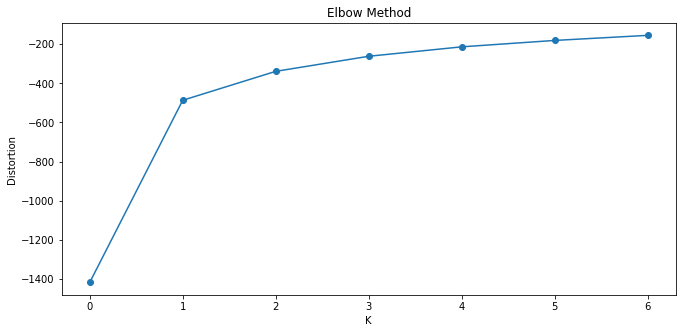

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(clust, 'o-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [ ]:
np.random.seed(200)
k = 3
centroids = {
    i+1: [np.random.randint(-2, 2), np.random.randint(-2, 2)]
    for i in range(k)
}

In [ ]:
def assign(dataframeX, centroids):
  for i in centroids.keys():
    dataframeX['distance_clust_{}'.format(i)] = (
        np.sqrt(
            (dataframeX[0] - centroids[i][0]) ** 2 
            + (dataframeX[1] - centroids[i][1]) **2
        )
    )
  
  centroids_distance = ['distance_clust_{}'.format(i) for i in centroids.keys()]
  dataframeX['cluster'] = dataframeX.loc[:, centroids_distance].idxmin(axis=1)
  dataframeX['cluster'] = dataframeX['cluster'].map(lambda x: int(x.lstrip('distance_clust_')))
  return dataframeX
  
dataframeX = assign(dataframeX, centroids)
dataframeX.head()

,0,1,distance_clust_1,distance_clust_2,distance_clust_3,cluster
0,3.416101,-1.802083,3.509000,5.419716,4.418304,1
1,6.264916,-0.515655,6.283611,8.397150,6.445649,1
2,3.385025,-0.600574,3.408510,5.563892,3.744360,1
3,4.931679,-1.582457,4.965956,6.944244,5.566916,1
4,4.409442,-0.216152,4.478571,6.653049,4.574080,1


In [ ]:
dataframeX[97:108]

,0,1,distance_clust_1,distance_clust_2,distance_clust_3,cluster
97,-4.380808,0.451690,4.615071,3.417460,4.414988,2
98,-3.295206,-0.779892,3.302549,1.779388,3.745183,2
99,-2.548582,-0.821657,2.554814,1.299783,3.132683,2
100,-4.584567,0.496539,4.822643,3.593424,4.612129,2
101,-2.386871,0.197146,2.670264,2.230946,2.518278,2
102,-5.006900,-2.030244,5.111795,3.007052,5.852472,2
103,-2.988779,-0.600511,3.015360,1.713550,3.390345,2
104,-3.661533,-1.446846,3.688699,1.751192,4.403848,2
105,-1.706632,-0.268698,1.856716,1.755981,2.126544,2
106,-2.443358,-1.440170,2.482689,0.714126,3.453176,2


In [ ]:
import copy

centroids_bfr = copy.deepcopy(centroids)
dataframeX.cluster.value_counts()

3    50
1    48
2    43
Name: cluster, dtype: int64

In [ ]:
def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(dataframeX[dataframeX['cluster'] ==  i][0])
    centroids[i][1] = np.mean(dataframeX[dataframeX['cluster'] ==  i][1])
  return k

update = update(centroids)

In [ ]:
dataframeX = assign(dataframeX, centroids)
dataframeX.head()

,0,1,distance_clust_1,distance_clust_2,distance_clust_3,cluster
0,3.415377,-1.822039,1.585571,7.222160,3.870107,1
1,6.272412,-0.402226,4.259249,9.945001,5.378063,1
2,3.371779,-0.656320,1.361242,7.047756,2.961591,1
3,4.939167,-1.546889,2.933403,8.683056,4.736441,1
4,4.400048,-0.226400,2.470064,8.075301,3.576951,1


In [ ]:
while True:
  closest_centroids = dataframeX['cluster'].copy(deep=True)
  centroids.update(centroids)
  dataframeX = assign(dataframeX, centroids)
  if closest_centroids.equals(dataframeX['cluster']):
    break    

In [ ]:
dataframeX.cluster.value_counts()

1    58
2    47
3    36
Name: cluster, dtype: int64

(array([58.,  0.,  0.,  0.,  0., 47.,  0.,  0.,  0., 36.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

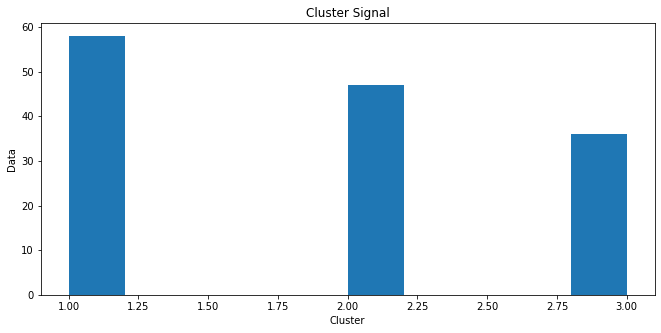

In [ ]:
plt.figure(figsize=(11,5))
plt.xlabel('Cluster')
plt.ylabel('Data')
plt.title('Cluster Signal')
plt.hist(dataframeX['cluster'])

In [ ]:
dataPlot = pd.DataFrame()
dataPlot['0'] = dataframeX[0]
dataPlot['1'] = dataframeX[1]
dataPlot['2'] = dataframeX[2]
dataPlot['3'] = dataframeX[3]
dataPlot['4'] = dataframeX[4]
dataPlot['desc'] = dataset['desc']
dataPlot['label'] = dataset['label']
dataPlot.sample(n=18)

,0,1,2,3,4,desc,label
62,-0.533992,-0.753368,1.962536,-0.682227,-0.060547,6.4800.5500,AF
134,-4.350265,-0.312151,-1.746866,0.791572,0.135741,2.6211.8109,Normal
97,-2.523787,-0.832346,-0.138709,-0.673595,1.000660,N 2.2000.3000,Normal
128,-4.257085,-0.472785,1.524313,-0.112494,0.826559,N 4.2000.3000,Normal
27,1.103036,-0.908845,-0.382279,-0.373366,-0.289959,4.1000.2500,AF
14,1.870930,0.171440,-1.646512,-1.817987,-0.901263,3.2630.3430,PVC
45,2.455270,-0.064459,-0.707226,-0.221987,0.209482,5.7000.8000,AF
93,-3.577619,-0.862178,-0.014031,-0.460662,0.694289,N 1.1000.2000,Normal
47,2.921653,0.399270,-2.018312,-0.517388,1.072238,5.9000.10000,AF
138,-4.497323,0.236336,-1.978764,1.027589,0.274838,2.14660.16708,Normal


In [ ]:
dataPlot[70:90]

,0,1,2,3,4,desc,label
70,-0.061878,-1.174251,0.533049,-0.633340,-0.023143,6.12600.13400,AF
71,0.880767,-0.098834,1.480927,-0.552327,-0.115745,6.13410.14300,PVC
72,-0.624240,2.051845,0.531055,-1.021846,0.022275,6.14360.14660,PVC
73,0.846477,-0.947280,0.159135,-0.493922,-0.142978,6.14700.16150,AF
74,2.887991,-1.540415,-0.175563,-0.395175,-0.182743,6.16200.16700,AF
75,2.018149,0.239200,-0.498199,0.441571,-0.010640,6.16800.18500,AF
76,2.358297,0.551644,-0.584972,0.155517,0.203867,6.18555.18900,PVC
77,1.284249,1.051082,0.161051,0.671154,-0.333432,6.19000.20500,PVC
78,3.522084,-1.375798,-0.933778,-0.287738,0.420006,6.20600.21700,AF
79,2.841976,-1.251504,-0.590979,0.150142,0.590106,6.22000.22650,AF


In [ ]:
sns.set_theme(color_codes=True)

<Figure size 432x288 with 0 Axes>

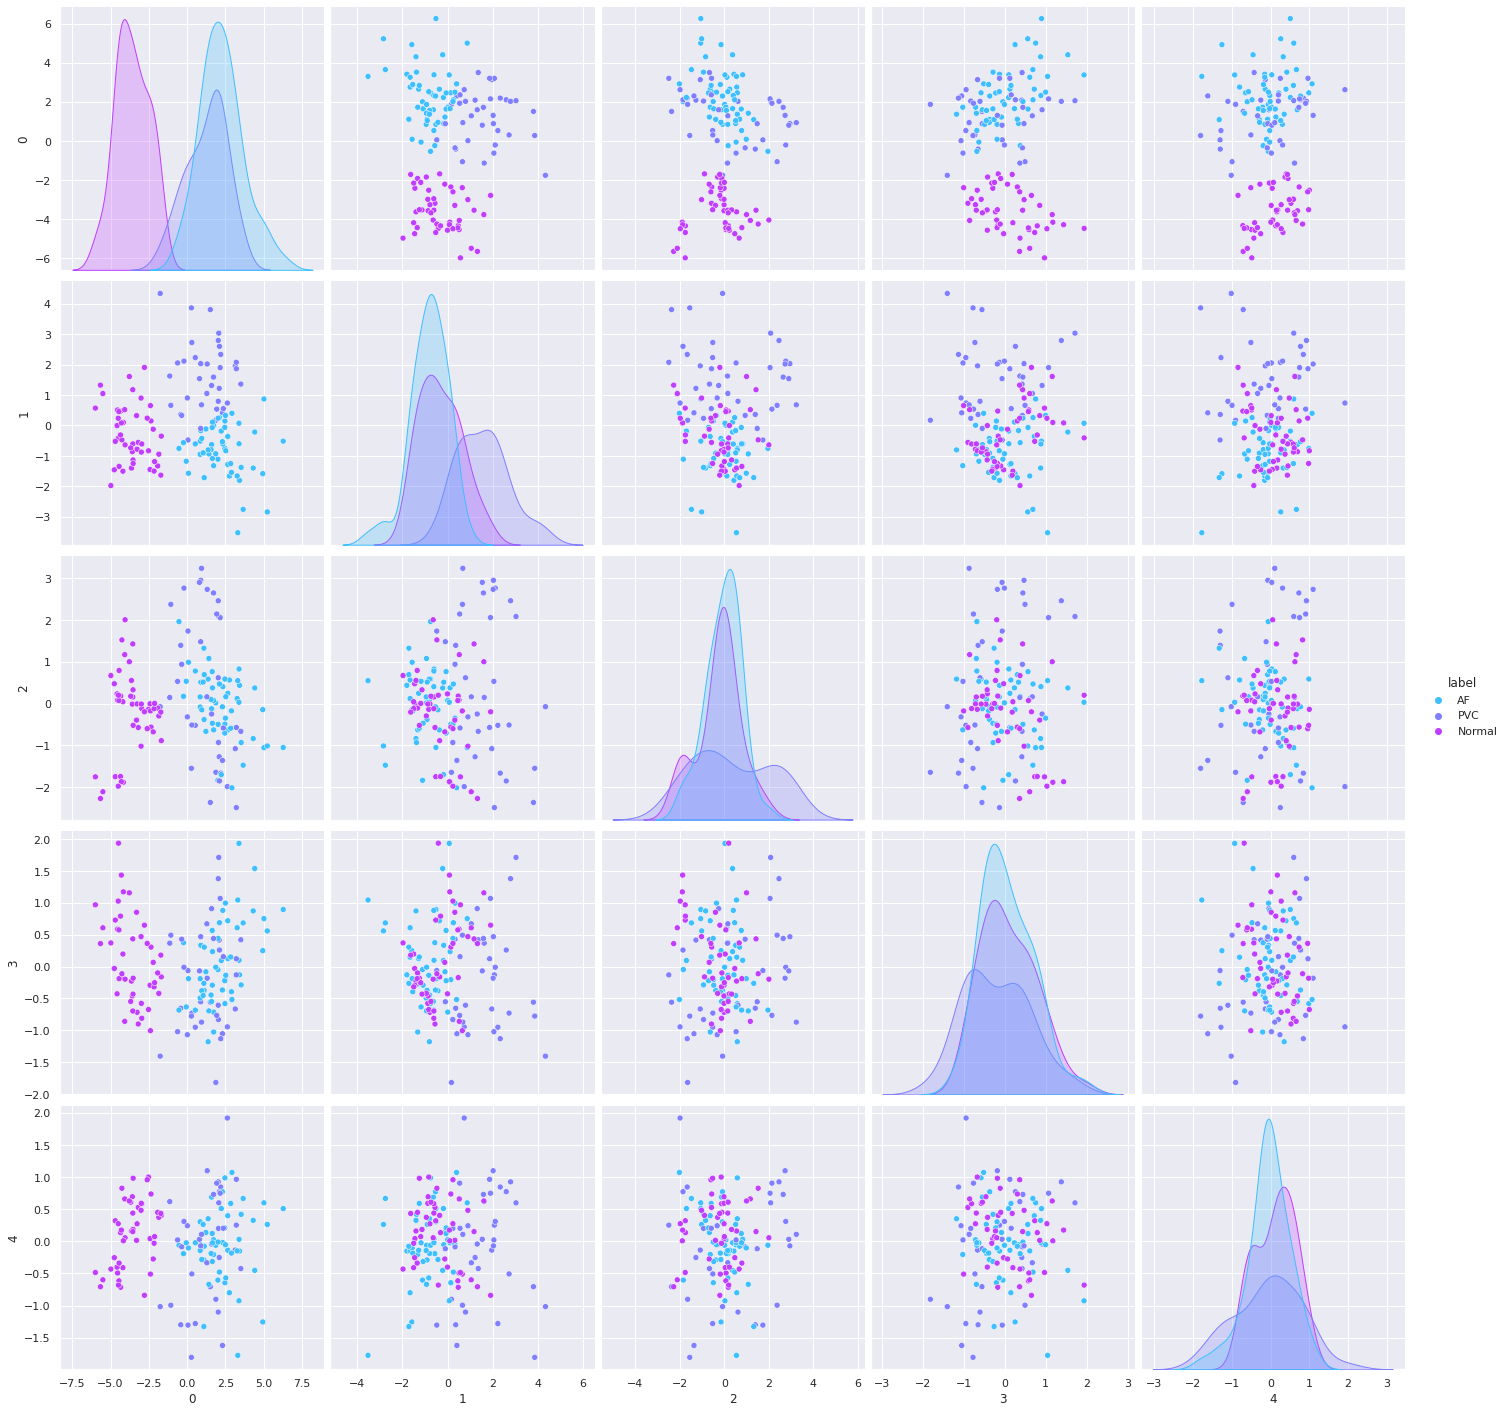

In [ ]:
plt.figure()
sns.pairplot(dataPlot.drop(['desc'], axis=1), palette='cool', hue='label', height=4)
# plt.title("Cluster dataset hasil (PCA) terhadap label")

<Figure size 432x288 with 0 Axes>

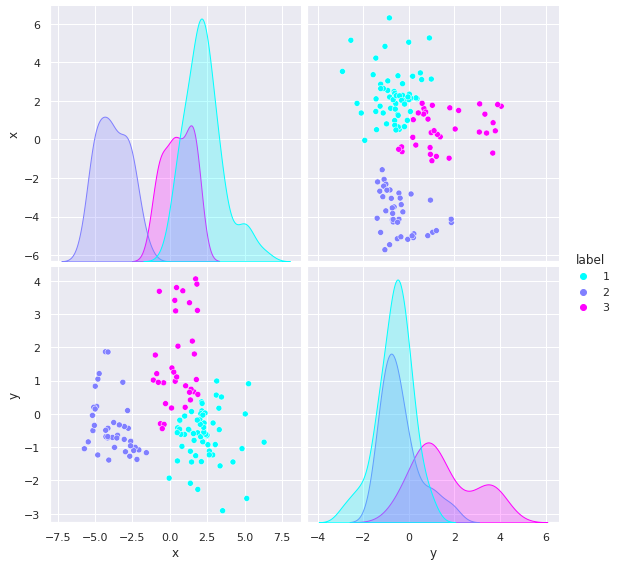

In [ ]:
plt.figure()
sns.pairplot(dataPlot.drop(['desc'], axis=1), palette='cool', hue='label', height=4)
# plt.title("Cluster dataset hasil (PCA) terhadap label")

In [ ]:
PCA_dataFrame = pd.DataFrame()
PCA_dataFrame = pd.DataFrame(pecea_dataX)
PCA_dataFrame['label'] = pd.DataFrame(dataset['label'])
PCA_dataFrame.sample(n=15)

,0,1,label
121,-2.789401,1.904553,Normal
57,2.496029,0.328595,AF
27,1.103036,-0.908845,AF
63,2.105706,0.257433,AF
111,-4.572114,-0.004004,Normal
72,-0.624240,2.051845,PVC
124,-4.480308,-0.409354,Normal
80,0.531648,-0.605624,AF
53,1.417128,-0.933449,AF
13,1.509290,3.802024,PVC


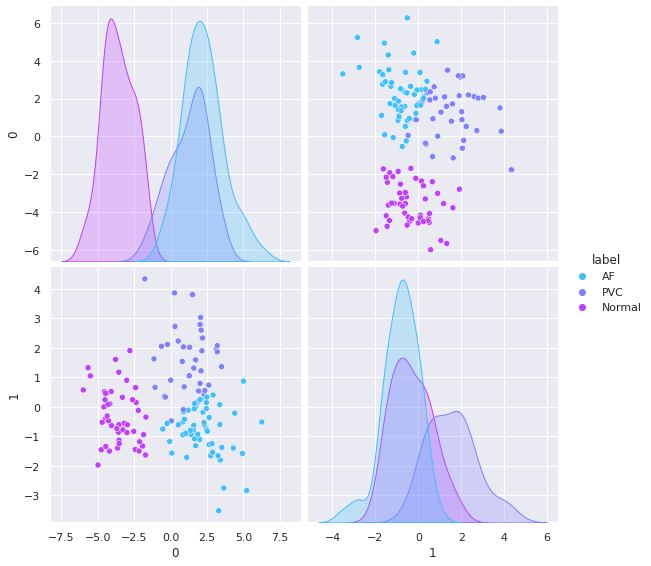

In [ ]:
sns.pairplot(PCA_dataFrame, palette='cool', hue='label', height=4)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmean.fit(dataframeX)
kmean

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label = kmean.labels_

In [ ]:
cek = kmean.fit_predict(dataframeX)
cek

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [ ]:
# dataframeX['label'] = dataset['label']
dataframeX['desc'] = dataset['desc']
dataframeX['cluster'] = pd.DataFrame(cek)
dataframeX.tail

<bound method NDFrame.tail of             0         1  ...  cluster           desc
0    3.399564 -0.666551  ...        1      1.50.1050
1    0.347742 -2.178200  ...        2    1.1050.2050
2    6.302634  0.458250  ...        1    1.2050.3050
3    3.210871 -1.195214  ...        1    1.3050.4050
4    5.052438 -0.420173  ...        1    1.4250.5250
..        ...       ...  ...      ...            ...
150 -4.657630 -1.640772  ...        0     N 4.0.1000
151 -4.668547 -0.997019  ...        0  N 4.1000.2000
152 -4.886242 -1.125689  ...        0  N 4.2000.3000
153 -4.554676 -0.855221  ...        0  N 4.3000.4000
154 -4.253516 -1.295157  ...        0  N 4.4000.4665

[155 rows x 7 columns]>

In [ ]:
dataframeX[0:27]

,0,1,desc,cluster
0,3.213269,-1.004432,3.50.1050,1
1,0.192044,5.157886,3.1050.2050,0
2,6.498059,-0.398830,3.2050.3050,1
3,3.044409,0.265740,3.3050.4050,1
4,4.728249,-1.026891,3.4250.5250,1
5,4.164006,0.367713,3.5250.6250,1
6,4.820786,0.452643,3.5650.6650,1
7,1.688950,-2.096382,3.6150.7150,1
8,5.133759,1.396114,3.7220.8230,1
9,5.260676,-2.599166,3.9010.10330,1


In [ ]:
dataframeX.value_counts(label)

In [ ]:
dataframeX.to_csv('datasetXs Fx1U.csv')